## Bayesian Approach to data analysis

__Frequentist inference__ is a method of statistical inference in which conclusions from data is obtained by emphasizing the frequency or proportion of the data.

__Bayesian inference__ is a method of statistical inference in which Bayes’ theorem is used to update the probability for a hypothesis as more evidence or information becomes available.

__Classic example:__ If we had 1 coin toss and it shows up head, frequentist inference will give us that the probability of heads (of the coin) is equal to 1. Bayesian inference however incorporates a prior probability, if we think that maybe the probability of heads should be around 0.5 then we can include this in our prior beliefs. This essentially drags your estimate of the probability of heads away from what the data tells you i.e. $1$ to somewhere between 0.5 and 1.

### Conditional Probability

If $A$ and $B$ are two different events, then the conditional probability of $A$ given $B$ is

$$P(A\mid B) = \frac{P(A\cap B)}{P(B)}, \quad P(B)\neq 0$$

### Bayes Theorem

Bayes theorem is one of the fundamental theorems in statistics and Bayesian statistics exploits this theorem to death. With the same conditions as above, Bayes theorem tells us that

$$P(A \mid B) = \frac{P(B\mid A)P(A)}{P(B)}$$

__Example:__ Suppose you see a stunning person with long hair on the street but can't tell if shes female or male. Consider the events, $A =$ person is woman and $B = $ person has long hair.

You want to compute $P(A\mid B)$. We assume that $P(A) = 0.5$, $P(B) = 0.4$ and $P(B|A) = 0.75$.

$$P(A|B) = \frac{0.75 \times 0.5}{0.4} = 0.9375$$

So you're pretty sure that the person is a woman.

### How do Bayesians do data analysis?

We can generalise Bayes theorem to the case where $P$ is a distribution $f$.

Suppose that you have sample of observations of a random variable $Y \sim f(y\mid \theta)$, then we can write Bayes theorem as

$$f(\theta \mid y) = \frac{f(y\mid \theta)f(\theta)}{f(y)} = \frac{f(y\mid \theta)f(\theta)}{\int f(y \mid \theta)f(\theta) d\theta}$$ 

* $f(y\mid \theta)$ is called the "likelihood"
* $f(\theta)$ is called the "prior"
* $f(y) = \int f(y \mid \theta)f(\theta) d\theta$ by marginalising e.g. (Law of total probability in continuous case)

Bayesians usually only consider the numerator in the equation since the denominator is a constant (however we don't know this constant and it gives us alot of trouble as our distributions get less complicated). Thus we write

$$f(\theta \mid y) \propto \text{likelihood} \times \text{prior}$$

## Example

Suppose that we collect $n$ samples of data, $y$, that follow a Poisson distribution,

$$Y \sim Poisson(\lambda)$$

$$f(y_i \mid \lambda) = \frac{e^{-\lambda}\lambda^{y_i}}{y_i!}$$

Let us consider a prior distribution for the parameter $\lambda$ that comes from a gamma prior distribution.

$$f(\lambda) \sim \text{Gamma}(a,b)$$

$$f(\lambda) = \frac{b^a}{\Gamma(a)} \lambda^{a-1}e^{-b\lambda}$$

#### Likelihood

$$f(y|\lambda) = \prod_{i=1}^{n} \frac{e^{-\lambda}\lambda^{y_i}}{y_i!} = \frac{e^{-n\lambda}\lambda^{\sum_{i=1}^{n}y_i}}{\prod_{i=1}^ny_i!} $$

#### Posterior distribution

$$f(\lambda|y) \propto e^{-n\lambda}\lambda^{\sum_{i=1}^{n}y_i} \times \lambda^{a-1}e^{-b\lambda} = \lambda^{(\sum_{i=1}^n y_i + a) - 1} e^{-(n+b)\lambda}$$

In [55]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import scipy.special as sp
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

# We set a seed so that the results are reproducible.
np.random.seed(5)

# number of samples.
n = 100

# true parameter.
λ_true = 2

# sample array.
y = np.random.poisson(lam=λ_true, size=n)

y

array([2, 4, 1, 0, 2, 2, 2, 2, 1, 1, 3, 2, 0, 1, 3, 3, 4, 2, 0, 0, 3, 6,
       1, 2, 1, 2, 5, 2, 3, 0, 1, 3, 1, 4, 1, 2, 4, 0, 6, 4, 1, 2, 2, 0,
       1, 2, 4, 4, 1, 3, 0, 3, 3, 2, 4, 2, 2, 1, 1, 2, 5, 2, 3, 0, 1, 1,
       1, 3, 4, 1, 3, 4, 2, 1, 2, 4, 2, 2, 1, 0, 2, 2, 3, 0, 3, 3, 4, 2,
       2, 1, 2, 1, 3, 0, 1, 0, 3, 3, 1, 2])

In [56]:
# mean of the sample.
y.mean()

2.06

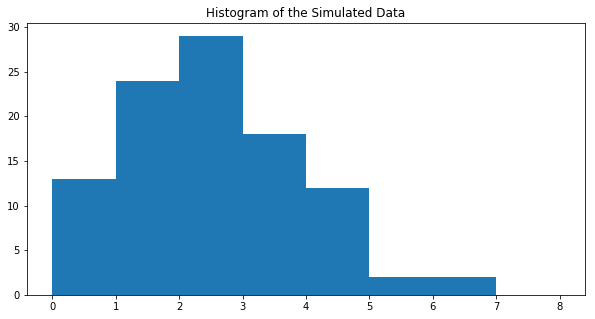

In [57]:
# Histogram of the sample.
plt.hist(y, bins=[0,1,2,3,4,5,6,7,8], density=False)
plt.title('Histogram of the Simulated Data')
plt.show()

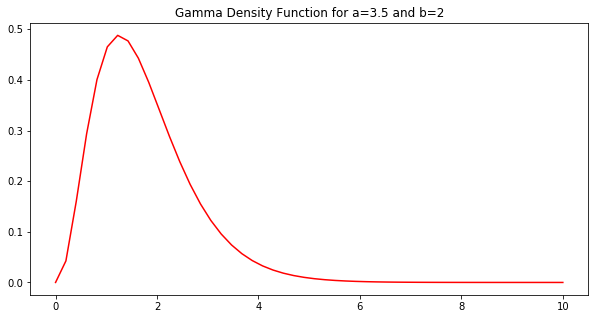

In [58]:
# Parameters of the prior gamma distribution.
a = 3.5  # shape
b = 2    # rate = 1/scale

x = np.linspace(0,10)
plt.plot(x, ss.gamma.pdf(x, a=a, scale=1/b), 'r-')
plt.title(f'Gamma Density Function for a={a} and b={b}')
plt.show()

# Define the prior distribution.
prior = lambda x: ss.gamma.pdf(x, a=a, scale=1/b)

In [59]:
# Define the likelihood function.
def likelihood(λ, y):
    
    factorials = np.apply_along_axis(lambda x: sp.gamma(x+1),
                                     axis=0,
                                     arr=y)
    numerator = np.exp(-λ*y.size) * (λ**y.sum())
    denominator = np.multiply.reduce(factorials)
    return numerator/denominator  

# Define the posterior distribution.
# (up to a constant)
def posterior_up_to_constant(λ, y):
    return likelihood(λ, y) * prior(λ)

# Plot of the prior and (scaled) posterior distribution
# for the parameter lambda.
#
# We multiply the posterior distrubution function
# by the amplitude factor 2.5e74 to make it comparable
# with the prior gamma distribution.

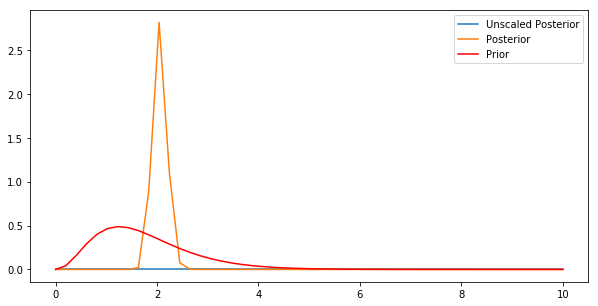

In [60]:
integrand = np.trapz(posterior_up_to_constant(x,y), x)
plt.plot(x, posterior_up_to_constant(x, y))
plt.plot(x, posterior_up_to_constant(x, y)/integrand)
plt.plot(x, ss.gamma.pdf(x, a=a, scale=1/b), 'r-')
plt.legend(['Unscaled Posterior', 'Posterior', 'Prior'])
plt.show()

### We can actually find the true posterior for $\lambda$

$$f(\lambda \mid y) \propto \lambda^{(\sum_{i=1}^n y_i + a) - 1} e^{-(n+b)\lambda}$$

Using the "Kernel Trick",

$$f(\lambda \mid y) = \text{Gamma}\left( \sum_{i=1}^n y_i + a, n+b \right)$$

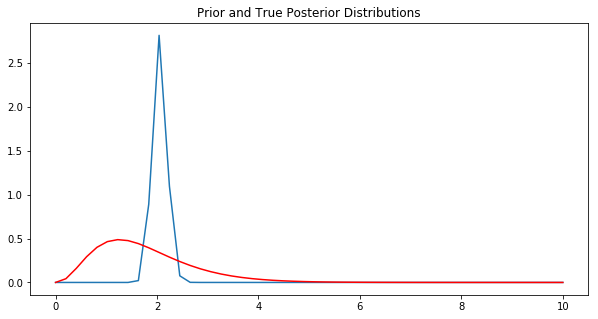

In [61]:
def posterior(lam,y, a, b):
    
    shape = a + y.sum()
    rate = b + y.size
    
    return ss.gamma.pdf(lam, shape, scale=1/rate)

plt.plot(x, posterior(x,y, a=a, b=b))
plt.plot(x, ss.gamma.pdf(x,a=a,scale=1/b), 'r-')
plt.title('Prior and True Posterior Distributions')
plt.legend(['Posterior', 'Prior'])
plt.show()

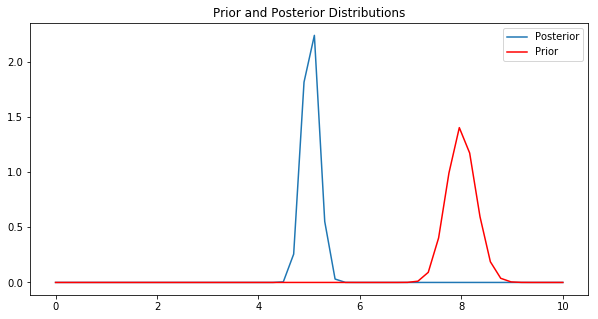

In [64]:
# What happens if we make the prior very informative
a=800
b=100
plt.plot(x, posterior(x,y, a=a, b=b))
plt.plot(x, ss.gamma.pdf(x,a=a,scale=1/b), 'r-')
plt.title('Prior and Posterior Distributions')
plt.legend(['Posterior', 'Prior'])
plt.show()